In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Importing libraries for model Pipeline
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.metrics import f1_score, accuracy_score,classification_report, confusion_matrix,precision_score,recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve,auc,roc_curve


#import xgboost as xgb
#from xgboost.sklearn import XGBClassifier
#from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV


In [4]:
data=pd.read_csv('CSV2018Head1.csv')

In [5]:
df = data[data['AB_NICU']!='U']

In [6]:
#field_sel1 = pd.read_csv('field_sel.csv')
##['DOB_YY', 'DOB_MM', 'DOB_TT', 'DOB_WK']

field_sel=['BFACIL', 'MAGER9',
       'MBSTATE_REC', 'RESTATUS', 'MRACE6', 'MHISP_R', 'DMAR', 'F_MEDUC',
       'FAGEREC11', 'FRACE6', 'FHISP_R', 'FEDUC', 'PRIORTERM', 'ILLB_R11',
       'PRECARE5', 'PREVIS_REC', 'CIG0_R', 'CIG1_R', 'CIG2_R', 'CIG3_R',
       'M_Ht_In', 'PWgt_R', 'WTGAIN_REC', 'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE',
       'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC',
       'RF_CESAR', 'RF_CESARN', 'MRACE6', 'MHISP_R', 'DMAR', 'F_MEDUC',
       'FAGEREC11', 'FRACE6', 'FHISP_R', 'FEDUC', 'PRIORTERM',
       'ILLB_R11', 'PRECARE5', 'PREVIS_REC', 'CIG0_R', 'CIG1_R',
       'CIG2_R', 'CIG3_R', 'M_Ht_In', 'PWgt_R', 'WTGAIN_REC',
       'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE',
       'RF_PPTERM', 'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC', 'RF_CESAR',
       'RF_CESARN']


In [7]:
X = df[field_sel]
X.columns

Index(['BFACIL', 'MAGER9', 'MBSTATE_REC', 'RESTATUS', 'MRACE6', 'MHISP_R',
       'DMAR', 'F_MEDUC', 'FAGEREC11', 'FRACE6', 'FHISP_R', 'FEDUC',
       'PRIORTERM', 'ILLB_R11', 'PRECARE5', 'PREVIS_REC', 'CIG0_R', 'CIG1_R',
       'CIG2_R', 'CIG3_R', 'M_Ht_In', 'PWgt_R', 'WTGAIN_REC', 'RF_PDIAB',
       'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 'RF_INFTR',
       'RF_FEDRG', 'RF_ARTEC', 'RF_CESAR', 'RF_CESARN', 'MRACE6', 'MHISP_R',
       'DMAR', 'F_MEDUC', 'FAGEREC11', 'FRACE6', 'FHISP_R', 'FEDUC',
       'PRIORTERM', 'ILLB_R11', 'PRECARE5', 'PREVIS_REC', 'CIG0_R', 'CIG1_R',
       'CIG2_R', 'CIG3_R', 'M_Ht_In', 'PWgt_R', 'WTGAIN_REC', 'RF_PDIAB',
       'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 'RF_INFTR',
       'RF_FEDRG', 'RF_ARTEC', 'RF_CESAR', 'RF_CESARN'],
      dtype='object')

In [8]:
y_temp = df['AB_NICU']
y_temp

0        N
1        Y
2        N
3        N
4        Y
        ..
19996    N
19997    N
19998    N
19999    N
20000    N
Name: AB_NICU, Length: 19905, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
y1 = lb.fit_transform(y_temp)
y=pd.Series(y1)
y.name='AB_NICU'

In [10]:
y

0        0
1        1
2        0
3        0
4        1
        ..
19900    0
19901    0
19902    0
19903    0
19904    0
Name: AB_NICU, Length: 19905, dtype: int32

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19905 entries, 0 to 20000
Data columns (total 64 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BFACIL       19905 non-null  int64 
 1   MAGER9       19905 non-null  int64 
 2   MBSTATE_REC  19905 non-null  int64 
 3   RESTATUS     19905 non-null  int64 
 4   MRACE6       19905 non-null  int64 
 5   MHISP_R      19905 non-null  int64 
 6   DMAR         19905 non-null  int64 
 7   F_MEDUC      19905 non-null  int64 
 8   FAGEREC11    19905 non-null  int64 
 9   FRACE6       19905 non-null  int64 
 10  FHISP_R      19905 non-null  int64 
 11  FEDUC        19905 non-null  int64 
 12  PRIORTERM    19905 non-null  int64 
 13  ILLB_R11     19905 non-null  int64 
 14  PRECARE5     19905 non-null  int64 
 15  PREVIS_REC   19905 non-null  int64 
 16  CIG0_R       19905 non-null  int64 
 17  CIG1_R       19905 non-null  int64 
 18  CIG2_R       19905 non-null  int64 
 19  CIG3_R       19905 non-nu

In [12]:
# Numerical columns
num_feat = X.select_dtypes(include='number').columns.to_list()

# Categorical columns
cat_feat = X.select_dtypes(include='object').columns.to_list()
print(len(num_feat))
print(len(cat_feat))
print('NUMERICAL_FEATURES:',num_feat)
print('CATEGORICAL_FEATURES:',cat_feat)

44
20
NUMERICAL_FEATURES: ['BFACIL', 'MAGER9', 'MBSTATE_REC', 'RESTATUS', 'MRACE6', 'MHISP_R', 'DMAR', 'F_MEDUC', 'FAGEREC11', 'FRACE6', 'FHISP_R', 'FEDUC', 'PRIORTERM', 'ILLB_R11', 'PRECARE5', 'PREVIS_REC', 'CIG0_R', 'CIG1_R', 'CIG2_R', 'CIG3_R', 'M_Ht_In', 'PWgt_R', 'WTGAIN_REC', 'RF_CESARN', 'MRACE6', 'MHISP_R', 'DMAR', 'F_MEDUC', 'FAGEREC11', 'FRACE6', 'FHISP_R', 'FEDUC', 'PRIORTERM', 'ILLB_R11', 'PRECARE5', 'PREVIS_REC', 'CIG0_R', 'CIG1_R', 'CIG2_R', 'CIG3_R', 'M_Ht_In', 'PWgt_R', 'WTGAIN_REC', 'RF_CESARN']
CATEGORICAL_FEATURES: ['RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC', 'RF_CESAR', 'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 'RF_INFTR', 'RF_FEDRG', 'RF_ARTEC', 'RF_CESAR']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state =42)

0    91.163024
1     8.836976
Name: AB_NICU, dtype: float64


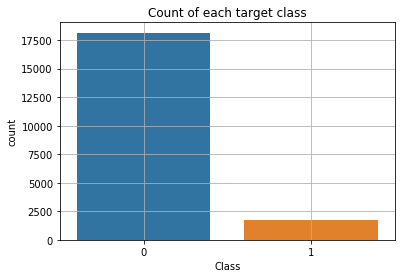

In [14]:
print(y.value_counts(normalize=True)*100)
sns.countplot(y)
plt.xlabel('Class')
plt.ylabel('count')
plt.title('Count of each target class')
plt.grid(b= True, which='major', axis='both')

### MVP

In [25]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values =0, strategy ='mean')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy ='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown= 'ignore'))
    
])

ct = ColumnTransformer(remainder = 'drop',
                      transformers=[
                          ('numerical', num_pipe, num_feat),
                          ('categorical', cat_pipe, cat_feat)
                      ])

##Logistic Regression
model_1 = Pipeline([
    ('ct', ct),
    ('logreg_classifier', LogisticRegression(solver = 'lbfgs',multi_class='auto'))   
])


## Decision Tree
model_2 = Pipeline([
    ('ct', ct),
    ('DT_classifier', DecisionTreeClassifier())   
])

## Random Forest
model_3 = Pipeline([
    ('ct', ct),
    ('RF_classifier', RandomForestClassifier(n_jobs = -1))
    
])

In [26]:
model_names = []
f1_sc = []
prec = []
recall = []
auc_val =[]


for model in [model_1, model_2, model_3]:
    model.fit(X_train, y_train)
    print('=============================== Test Results for:','{} '.format(model.steps[1][0]))
    print('====================================================================================')
   
    y_train_pred = model.predict(X_train)
    print('In-sample f1 score:', f1_score(y_train, y_train_pred))

    y_test_pred = model.predict(X_test)
    print('Out-sample f1 score:',f1_score(y_test, y_test_pred))
    
    report = classification_report(y_test, y_test_pred)
    print(report)

    conf_mat=confusion_matrix(y_test, y_test_pred)
    print('confusion_matrix')
    print(conf_mat)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    
    
    model_names.append(model.steps[1][0])
    f1_sc.append(f1_score(y_test, y_test_pred))
    prec.append(precision_score(y_test, y_test_pred))
    recall.append(recall_score(y_test, y_test_pred))
    auc_val.append(auc(fpr, tpr))
    
     
    #print('TP:', conf_mat[1][1])
   #print('TN:', conf_mat[0][0])
   #print('FP:', conf_mat[0][1])
   #print('FN:', conf_mat[1][0])

   #classes = ['Not Fraud', 'Fraud']
   #plot_confusion_matrix(model, X_test, y_test,display_labels = classes,cmap=plt.cm.Blues)
   ###Normalization can be applied by setting `normalize='true', 'pred' 'all' or None.
    
    
    #plot_precision_recall_curve(model,X_test,y_test)
    
    #plot_roc_curve(model,X_test,y_test)
    
print('=============================== END=============================')

C:\Users\rdeo\anaconda3\envs\insight_prj\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


=============================== Test Results for: logreg_classifier 
In-sample f1 score: 0.08283233132932533
Out-sample f1 score: 0.08808290155440415
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3620
           1       0.68      0.05      0.09       361

    accuracy                           0.91      3981
   macro avg       0.80      0.52      0.52      3981
weighted avg       0.89      0.91      0.88      3981

confusion_matrix
[[3612    8]
 [ 344   17]]
=============================== Test Results for: DT_classifier 
In-sample f1 score: 0.9996422182468694
Out-sample f1 score: 0.20565552699228792
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3620
           1       0.19      0.22      0.21       361

    accuracy                           0.84      3981
   macro avg       0.56      0.56      0.56      3981
weighted avg       0.86      0.84      0.85      3981

confusi

In [27]:
perf_df = pd.DataFrame(list(zip(prec, recall,f1_sc,auc_val)),
                       index = model_names, 
                       columns =['prec_score', 'recall_score','f1_score', 'auc_score'])

perf_df


,prec_score,recall_score,f1_score,auc_score
logreg_classifier,0.680000,0.047091,0.088083,0.522441
DT_classifier,0.191847,0.221607,0.205656,0.564256
RF_classifier,0.653846,0.094183,0.164649,0.544605


 * **high recall + high precision** : the class is perfectly handled by the model
 * **low recall + high precision** : the model can’t detect the class well but is highly trustable when it does
 * **high recall + low precision** : the class is well detected but the model also include points of other classes in it
 * **low recall + low precision** : the class is poorly handled by the model
 
In the present dataset FP is more acceptable than FN. So, ideally the model should minimize FN i.e we need to optimize our model for Sensitivity(HIGH RECALL VALUE IS DESIRED). 
 
 Low precision indicates a high number of false positives. Model includes more FP.
 Low Recall means high number of false negatives. 

https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

## Balancing the Skewed Dataset

*As mentioned above the current dataset is highly skewed.In such extreme cases the ideal solution is to collect mre data.
However, this solution is not always feasible and hence we need to go for some other course of action. The alternative way to handle such imbalanced data is the resampling technique
 * Undersampling(majority class)
 * Oversampling (minority class)
 * SMOTE(generating synthetic samples)
